In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/delhi-house-price-prediction/MagicBricks.csv


In [2]:
df=pd.read_csv("/kaggle/input/delhi-house-price-prediction/MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [4]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [5]:
df.shape

(1259, 11)

In [6]:
df.duplicated().sum()

83

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isna().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       5
Locality         0
Parking         31
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       227
dtype: int64

In [9]:
df['Per_Sqft'].fillna((df['Price']/df['Area']),inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0],inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0],inplace=True)
df['Parking'].fillna(df['Parking'].mode()[0],inplace=True)
df['Type'].fillna(df['Type'].mode()[0],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1176 non-null   float64
 1   BHK          1176 non-null   int64  
 2   Bathroom     1176 non-null   float64
 3   Furnishing   1176 non-null   object 
 4   Locality     1176 non-null   object 
 5   Parking      1176 non-null   float64
 6   Price        1176 non-null   int64  
 7   Status       1176 non-null   object 
 8   Transaction  1176 non-null   object 
 9   Type         1176 non-null   object 
 10  Per_Sqft     1176 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 110.2+ KB


In [11]:
df[['Parking','Bathroom']]=df[['Parking','Bathroom']].astype('int64')

In [12]:
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [13]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1176.000000,1176.000000,1176.000000,1176.000000,1.176000e+03,1176.000000
mean,1447.542711,2.789966,2.551871,1.953231,2.109173e+07,15108.514563
std,1487.658687,0.960993,1.052994,6.409197,2.523174e+07,19767.263465
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000
25%,800.000000,2.000000,2.000000,1.000000,5.800000e+06,6584.000000
50%,1172.500000,3.000000,2.000000,1.000000,1.400000e+07,11111.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.600000e+07,17231.083333
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


## Data Visualisation

<Axes: >

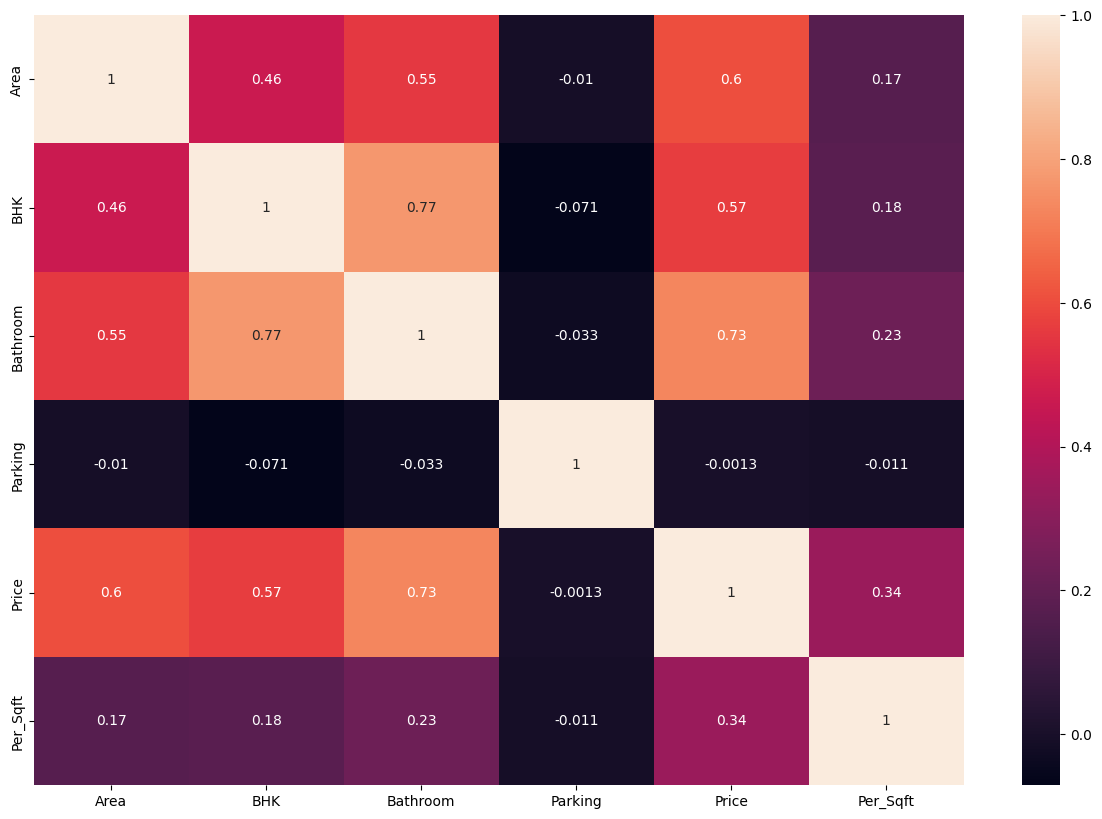

In [14]:
num_col=df[df.dtypes[df.dtypes != 'object'].index]
num_col

plt.figure(figsize=(15,10))
sns.heatmap(num_col.corr(),annot=True)

<Axes: xlabel='Area', ylabel='Count'>

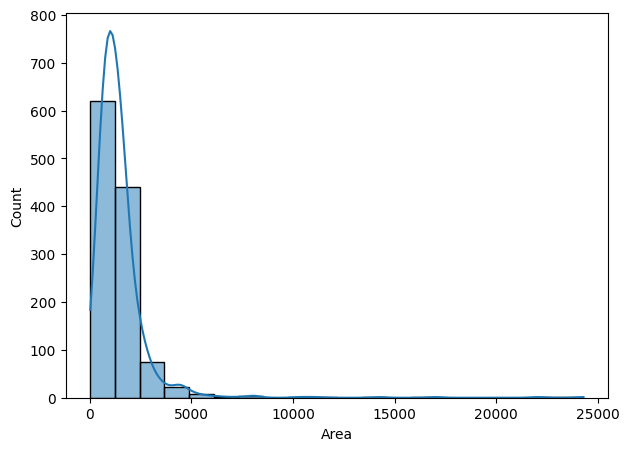

In [15]:
plt.figure(figsize=(7,5))
sns.histplot(x=df['Area'],kde=True,bins=20)

Correlation between BHK and Price is 0.5660388563585184
Skewness of the BHK is 0.5395026710389439
Correlation between Bathroom and Price is 0.7316835672458947
Skewness of the Bathroom is 0.8268062674140753
Correlation between Parking and Price is -0.0012735025532615667
Skewness of the Parking is 14.819394368883357


<Axes: xlabel='Bathroom', ylabel='Area'>

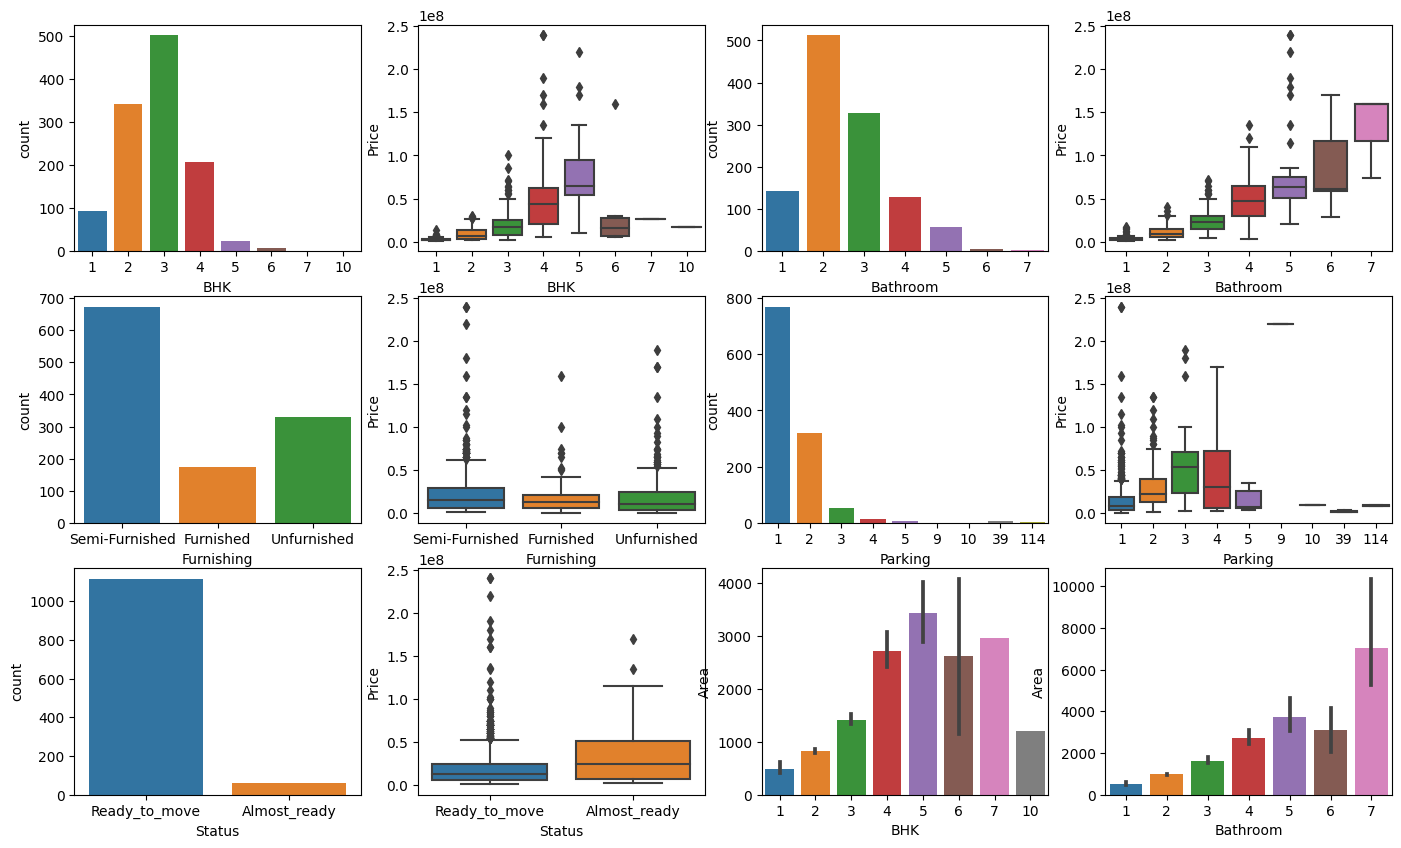

In [16]:
plt.figure(figsize=(17,10))
plt.subplot(3,4,1)
sns.countplot(x=df['BHK'])
plt.subplot(3,4,2)
sns.boxplot(x=df['BHK'],y=df['Price'])
print('Correlation between BHK and Price is',df['BHK'].corr(df['Price']))
print('Skewness of the BHK is',df['BHK'].skew())

plt.subplot(3,4,3)
sns.countplot(x=df['Bathroom'])
plt.subplot(3,4,4)
sns.boxplot(x=df['Bathroom'],y=df['Price'])
print('Correlation between Bathroom and Price is',df['Bathroom'].corr(df['Price']))
print('Skewness of the Bathroom is',df['Bathroom'].skew())


plt.subplot(3,4,5)
sns.countplot(x=df['Furnishing'])
plt.subplot(3,4,6)
sns.boxplot(x=df['Furnishing'],y=df['Price'])

plt.subplot(3,4,7)
sns.countplot(x=df['Parking'])
plt.subplot(3,4,8)
sns.boxplot(x=df['Parking'],y=df['Price'])
print('Correlation between Parking and Price is',df['Parking'].corr(df['Price']))
print('Skewness of the Parking is',df['Parking'].skew())

plt.subplot(3,4,9)
sns.countplot(x=df['Status'])
plt.subplot(3,4,10)
sns.boxplot(x=df['Status'],y=df['Price'])

plt.subplot(3,4,11)
sns.barplot(x=df['BHK'],y=df['Area'])
plt.subplot(3,4,12)
sns.barplot(x=df['Bathroom'],y=df['Area'])

In [17]:
df.drop(df.index[(df["Parking"] == 39)],axis=0,inplace=True)
df.drop(df.index[(df["Parking"] == 114)],axis=0,inplace=True)

Correlation between BHK and Price is 0.5642607180457285
Skewness of the BHK is 0.5568755920731645
Correlation between Bathroom and Price is 0.730956174101326
Skewness of the Bathroom is 0.8296331714159817
Correlation between Parking and Price is 0.38416278010248595
Skewness of the Parking is 3.3847019624326538


<Axes: xlabel='Bathroom', ylabel='Area'>

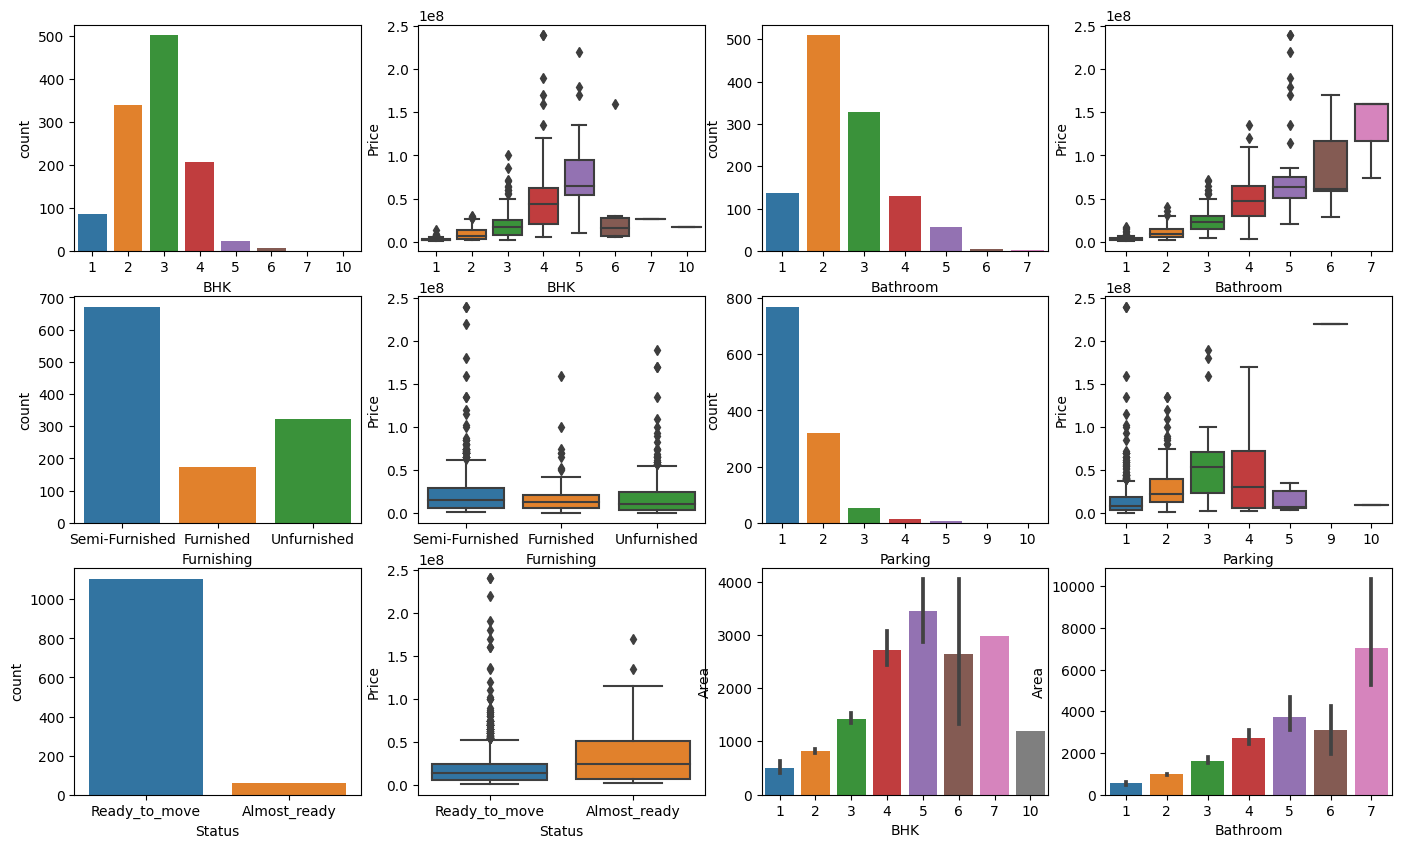

In [18]:
plt.figure(figsize=(17,10))
plt.subplot(3,4,1)
sns.countplot(x=df['BHK'])
plt.subplot(3,4,2)
sns.boxplot(x=df['BHK'],y=df['Price'])
print('Correlation between BHK and Price is',df['BHK'].corr(df['Price']))
print('Skewness of the BHK is',df['BHK'].skew())

plt.subplot(3,4,3)
sns.countplot(x=df['Bathroom'])
plt.subplot(3,4,4)
sns.boxplot(x=df['Bathroom'],y=df['Price'])
print('Correlation between Bathroom and Price is',df['Bathroom'].corr(df['Price']))
print('Skewness of the Bathroom is',df['Bathroom'].skew())


plt.subplot(3,4,5)
sns.countplot(x=df['Furnishing'])
plt.subplot(3,4,6)
sns.boxplot(x=df['Furnishing'],y=df['Price'])

plt.subplot(3,4,7)
sns.countplot(x=df['Parking'])
plt.subplot(3,4,8)
sns.boxplot(x=df['Parking'],y=df['Price'])
print('Correlation between Parking and Price is',df['Parking'].corr(df['Price']))
print('Skewness of the Parking is',df['Parking'].skew())

plt.subplot(3,4,9)
sns.countplot(x=df['Status'])
plt.subplot(3,4,10)
sns.boxplot(x=df['Status'],y=df['Price'])

plt.subplot(3,4,11)
sns.barplot(x=df['BHK'],y=df['Area'])
plt.subplot(3,4,12)
sns.barplot(x=df['Bathroom'],y=df['Area'])

<Axes: xlabel='Furnishing', ylabel='Price'>

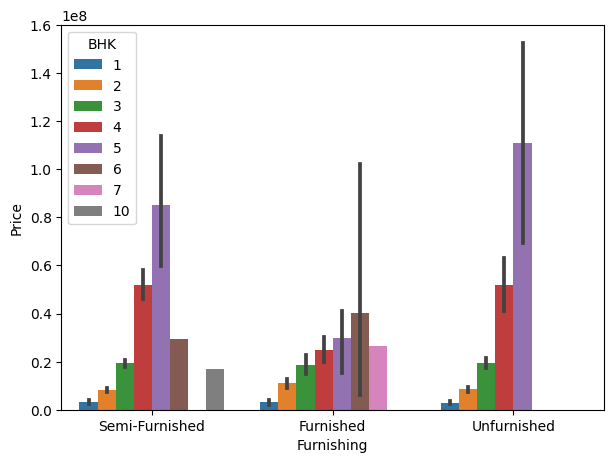

In [19]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Furnishing'],y=df['Price'],hue=df['BHK'])

In [20]:
#removing outliers
from scipy import stats 
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z < 3).all(axis=1)]

In [21]:
df.shape

(1090, 11)

Correlation between BHK and Price is 0.6362243849702915
Skewness of the BHK is -0.05465291984266268
Correlation between Bathroom and Price is 0.7750371973795972
Skewness of the Bathroom is 0.6523239506946427
Correlation between Parking and Price is 0.46719142811861836
Skewness of the Parking is 1.2902291645444939


<Axes: xlabel='Bathroom', ylabel='Area'>

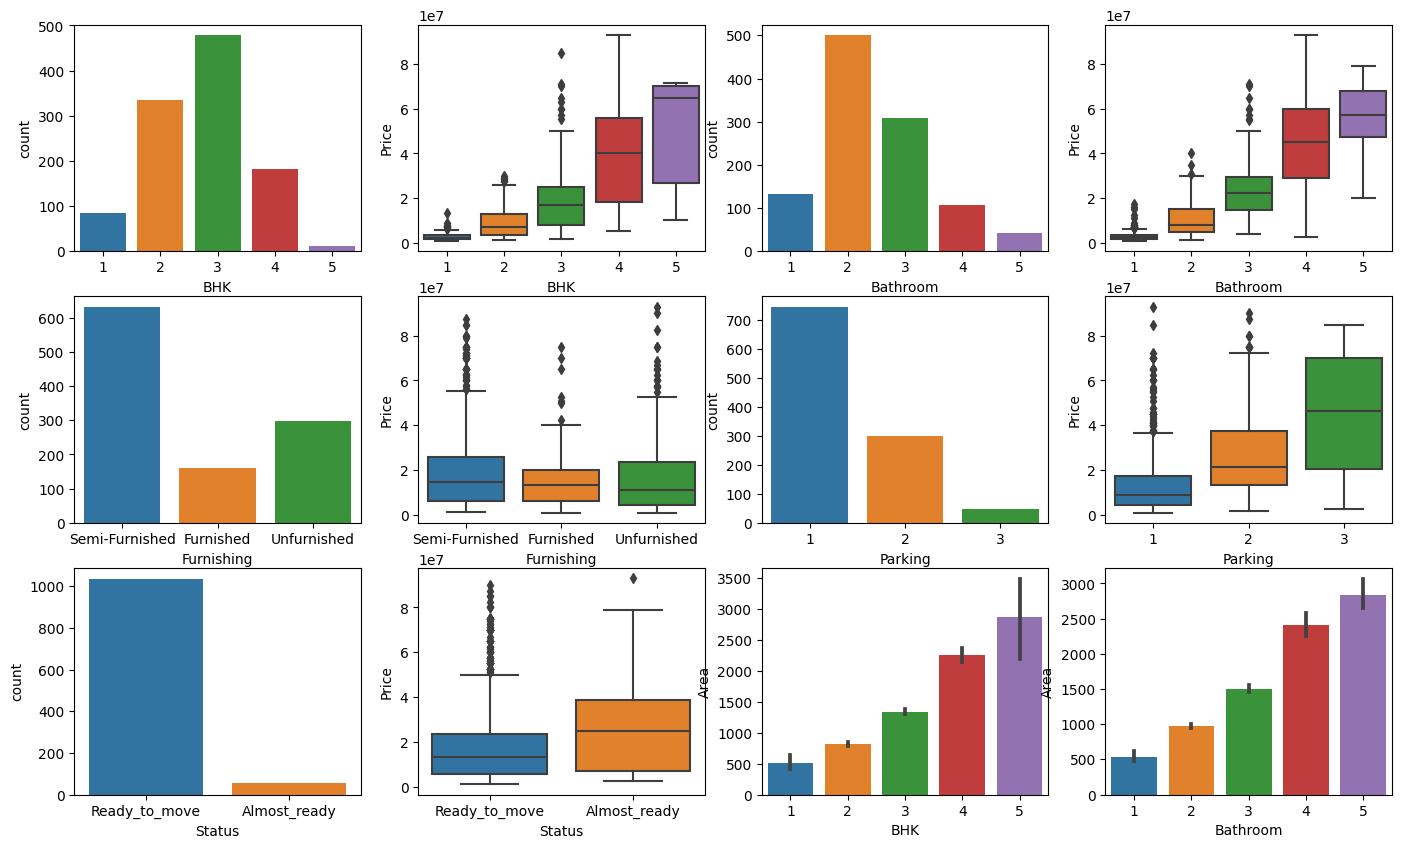

In [22]:
# Data Visualisation after removing outliers
plt.figure(figsize=(17,10))
plt.subplot(3,4,1)
sns.countplot(x=df['BHK'])
plt.subplot(3,4,2)
sns.boxplot(x=df['BHK'],y=df['Price'])
print('Correlation between BHK and Price is',df['BHK'].corr(df['Price']))
print('Skewness of the BHK is',df['BHK'].skew())

plt.subplot(3,4,3)
sns.countplot(x=df['Bathroom'])
plt.subplot(3,4,4)
sns.boxplot(x=df['Bathroom'],y=df['Price'])
print('Correlation between Bathroom and Price is',df['Bathroom'].corr(df['Price']))
print('Skewness of the Bathroom is',df['Bathroom'].skew())

plt.subplot(3,4,5)
sns.countplot(x=df['Furnishing'])
plt.subplot(3,4,6)
sns.boxplot(x=df['Furnishing'],y=df['Price'])

plt.subplot(3,4,7)
sns.countplot(x=df['Parking'])
plt.subplot(3,4,8)
sns.boxplot(x=df['Parking'],y=df['Price'])
print('Correlation between Parking and Price is',df['Parking'].corr(df['Price']))
print('Skewness of the Parking is',df['Parking'].skew())

plt.subplot(3,4,9)
sns.countplot(x=df['Status'])
plt.subplot(3,4,10)
sns.boxplot(x=df['Status'],y=df['Price'])

plt.subplot(3,4,11)
sns.barplot(x=df['BHK'],y=df['Area'])
plt.subplot(3,4,12)
sns.barplot(x=df['Bathroom'],y=df['Area'])

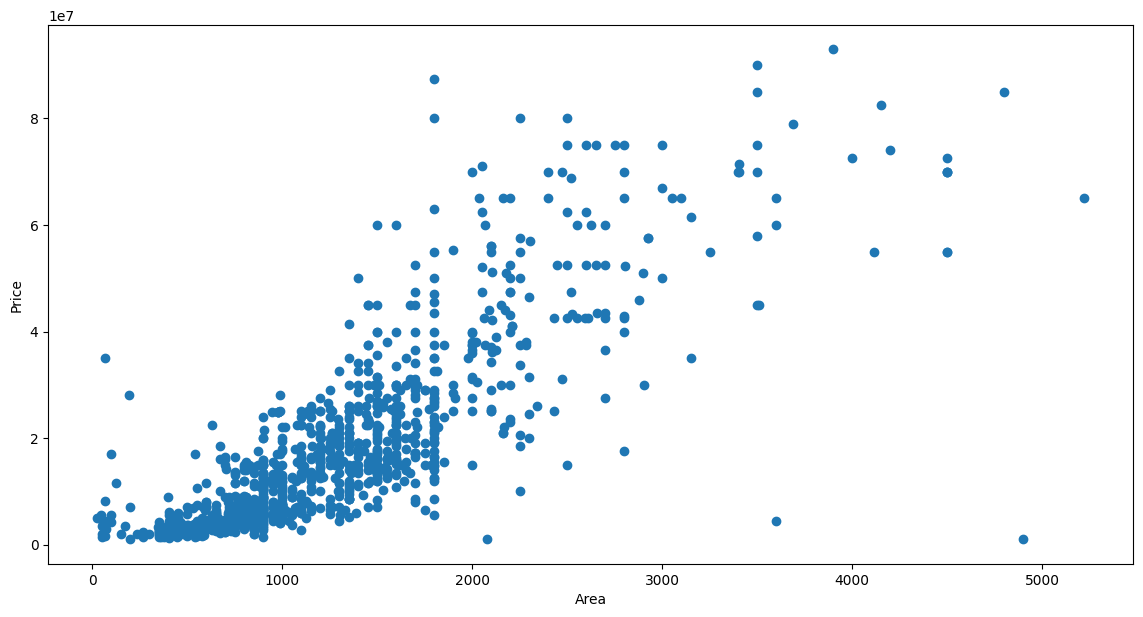

In [23]:
df.drop(df[df['Area'] > 30000].index, inplace = True)
plt.figure(figsize=(14,7))
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price)

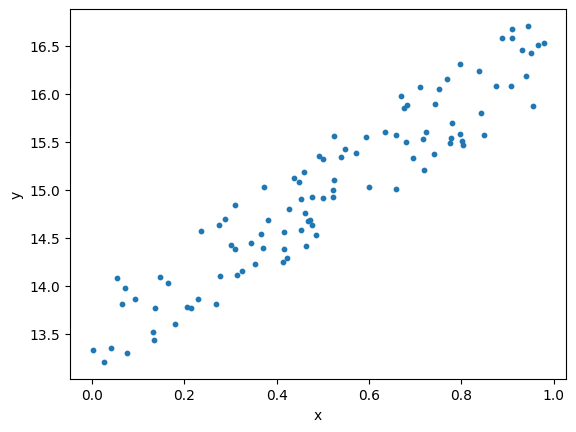

In [24]:
np.random.seed(7)
x = np.random.rand(100, 1)
y = 13 + 3 * x + np.random.rand(100, 1)
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# ML Modeling

In [25]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.3)

In [26]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [27]:
Y_pred = linear.predict(X_test)
print("Accuracy Score for Test Dataset is ",linear.score(X_test, Y_test)*100,"%")
print("Accuracy Score for Train Dataset is",linear.score(X_train,Y_train)*100,"%")

Accuracy Score for Test Dataset is  90.19146151426824 %
Accuracy Score for Train Dataset is 88.42863198257054 %


In [28]:
c1=float(linear.intercept_)
m1=float(linear.coef_)
print("Intercept (c) of regression line is", c1)
print("Coefficient (m) of regression line is", m1)

Intercept (c) of regression line is 13.345249192874208
Coefficient (m) of regression line is 3.1793735342131266


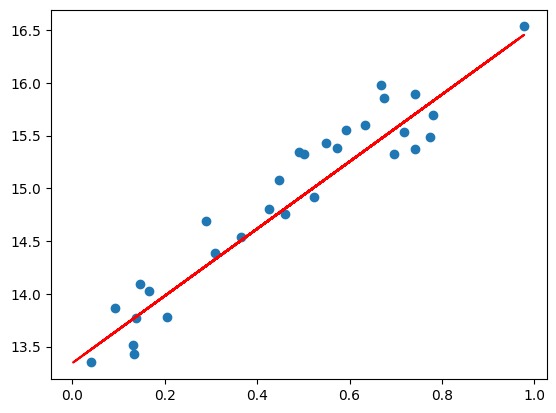

In [29]:
plt.scatter(X_test,Y_test)
plt.plot(x,m1*x+c1,color='red')

So this model Predicts the value of any house with an accuracy of 88.42%